# **Tutorial 2 : Energy Balance**


**Week 1, Day 5, Climate Modeling**

**Content creators:** Jenna Pearson

**Content reviewers:** Draco Xu, Will Gregory, Ohad Zivan, Chi Zhang

**Content editors:** Brodie Pearson, Abigail Bodner, Ohad Zivan, Chi Zhang

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

# **Tutorial Objectives**

In this tutorial students will learn about the components that define energy balance, including insolation and albedo.

By the end of this tutorial students will be able to:
* Calculate the albedo of Earth based on observations.
* Define and find the equilibrium temperature under the assumption of energy balance.
* Understand the relationship between transmissivity and equilibrium temperature.

# Setup

In [4]:
import xarray as xr                     # used to manipulate data and open datasets
import numpy as np                      # used for algebra and array operations
import matplotlib.pyplot as plt         # used for plotting

In [5]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [6]:
# @title Video 1: Energy Balance
#Tech team will add code to format and display the video

# Section 1 : A Radiating Sun

## Section 1.1: Incoming Solar Radiation (Insolation) and Albedo ($\alpha$)

Just as Earth emits radiation, so does the sun. The incoming solar radiation, called **[insolation](https://glossary.ametsoc.org/wiki/Insolation)**. From the 'All Sky' Energy budget shown below, this is observed to be $Q = 340 W m^{-2}$. 

Some of this radiation is reflected back to space (for example off of ice and snow or clouds). 

From the 'All Sky' energy budget below, the amount reflected back is $F_{ref} = 100 W m^{-2}$. 


![Global Mean Energy Budget](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_7_2.png)
Figure 7.2 | Schematic representation of the global mean energy budget of the Earth (upper panel), and its equivalent without considerations of cloud effects (lower panel). Numbers indicate best estimates for the magnitudes of the globally averaged energy balance components in W m–2 together with their uncertainty ranges in parentheses (5–95% confidence range), representing climate conditions at the beginning of the 21st century. Note that the cloud-free energy budget shown in the lower panel is not the one that Earth would achieve in equilibrium when no clouds could form. It rather represents the global mean fluxes as determined solely by removing the clouds but otherwise retaining the entire atmospheric structure. This enables the quantification of the effects of clouds on the Earth energy budget and corresponds to the way clear-sky fluxes are calculated in climate models. Thus, the cloud-free energy budget is not closed and therefore the sensible and latent heat fluxes are not quantified in the lower panel. Figure adapted from Wild et al. (2015, 2019). (Credit: [IPCC AR6 Report](https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_7_2.png))

The *fraction* of reflected radiation is captured by the **albedo (**$\mathbf{\alpha}$**)**

\begin{align}
\alpha = \frac{F_{ref}}{Q}
\end{align}

Albedo is a unitless number between 0 and 1. We can use this formula and python to find the albedo of Earth.

In [8]:
# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
Q = 340 # W m^-2

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
F_ref = 100 # W m^-2

# plug into equation
alpha = (F_ref/Q) # unitless number between 0 and 1

# display answer
print('Albedo: ',alpha)

Albedo:  0.29411764705882354


### Questions 1.1

1. Taking insolation ($Q$) to be constant, what does a low albedo imply? What about a high albedo?
2. There are two components to albedo, the reflected radiation in the numerator and the insolation in the denomenator. Do you think one or both of these have changed over Earth's history?

In [9]:
# to_remove explanation

"""
1. If the insolation does not vary, a low albedo implies that Earth is less reflective (e.g less cloud, snow or ice cover) and vice versa for high albedo.
2. Both. the reflected radiation is a function of land surface changes (e.g. glaciations and vegetation changes) and clouds (water vapor changes) as well as the radiation from the sun has also varied over time, which you will go into more detail in tutorial 4.
"""

'\n1. If the insolation does not vary, a low albedo implies that Earth is less reflective (e.g less cloud, snow or ice cover) and vice versa for high albedo.\n2. Both. the reflected radiation is a function of land surface changes (e.g. glaciations and vegetation changes) and clouds (water vapor changes) as well as the radiation from the sun has also varied over time, which you will go into more detail in tutorial 4.\n'

## Section 1.2 : Absorbed Shortwave Radiation (ASR)

The **absorbed shortwave radiation (ASR)** is the amount of this isolation that is *not* reflected, and actually makes it to Earth's surface. Thus,

\begin{align}
ASR = Q-F_{ref} = (1-\alpha)Q
\end{align}

Using observations and python we can esimate the absorbed shortwave radiation.

In [10]:
# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
Q = 340 # W m^-2

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
F_ref = 100 # W m^-2

# plug into equation
alpha = (F_ref/Q) # unitless number between 0 and 1

# plug into equation
ASR = (1-alpha)*Q

# display answer
print('Absorbed Shortwave Radiation: ',ASR,' W m^-2')

Absorbed Shortwave Radiation:  239.99999999999997  W m^-2


### Questions 1.2

1. Compare the value of ASR to the observed OLR of $239 W m^{-2}$. Is it more or less? What do you think this means?
2. Does this model take into account any effects of gases in that atmosphere on the incoming shortwave radiation that makes it to Earth's surface? Are there any greenhouse gases you think are important and should be included in more complex models?

In [11]:
# to_remove explanation

"""
1. It is slightly more. This means that Earth is absorbing more energy than it is losing. This is just to get you thinking about energy balance that will be discussed in the remainder of the tutorial.
2. It does not take these into account. For example, ozone is a notable greenhouse gas that absorbs in the UV range.
"""

'\n1. It is slightly more. This means that Earth is absorbing more energy than it is losing. This is just to get you thinking about energy balance that will be discussed in the remainder of the tutorial.\n2. It does not take these into account. For example, ozone is a notable greenhouse gas that absorbs in the UV range.\n'

# Section 2 : Energy Balance

## Section 2.1: Equilibrium Temperature

Energy Balance is achieved when radiation absorbed by Earth's surface (ASR) is equal to longwave radiation going out to space (OLR). That is 

\begin{align}
ASR = OLR
\end{align}

By substituting in the equations from previous sections, we can find the surface temperature of Earth needed to maintain this balance. This is called the **equilibrium temperature (** $\mathbf{T_{eq}}$ **)**.

Recall $OLR = \tau\sigma T^4$ and $ASR = (1-\alpha)Q$. The **equilibrium temperature** is the temperature the system would have if energy balance was perfectly reached. Assuming energy balance, we will call the emission temperature denoted previously the equilibrium temperature ($T_{eq}$) instead. Thus,

\begin{align}
(1-\alpha)Q = ASR = OLR = \tau\sigma T_{eq}^4
\end{align}

Solving for $T_{eq}$ we find

\begin{align}
T_{eq} = \sqrt[4]{\frac{(1-\alpha)Q}{\tau\sigma}}
\end{align}

We can implement this equation in python to find the numeric value.

In [12]:
# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
Q = 340 # W m^-2

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
F_ref = 100 # W m^-2

# define albedo
alpha = (F_ref/Q) # unitless number between 0 and 1

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127 # unitless number between 0 and 1

# plug into equation
T_eq = (((1-alpha)*Q)/(tau * sigma))**(1/4)

# display answer
print('Equilibrium Temperature: ',T_eq,'K or',T_eq - 273, 'C')

Equilibrium Temperature:  288.300287595812 K or 15.300287595811994 C


## Questions 2.1

1.  Is the calculated equilibrium temperature warmer or cooler than the observed surface temperature of $288 K$?
2.  What do you think is responsible for the difference? Refer to previous sections if needed.

In [13]:
# to_remove explanation

"""
1. It is warmer.
2. From the previous set of questions, Earth is absorbing more energy than it is releasing, and so the Earth system is warming.
"""

'\n1. It is warmer.\n2. From the previous set of questions, Earth is absorbing more energy than it is releasing, and so the Earth system is warming.\n'

# Section 3 : Climate Change Scenario

## Section 3.1: Increasing Greenhouse Gas Concentrations

Assume due to the increasing presence of greenhouse gases in the the atmosphere, that $\tau$ decreases to $0.57$. 

We can then use our climate model and python to find the new equilibrium temperature.

In [14]:
# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
Q = 340 # W m^-2

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
F_ref = 100 # W m^-2

# define albedo
alpha = (F_ref/Q) # unitless number between 0 and 1

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define transmissivity (assupmtion in this case)
tau = 0.57 # unitless number between 0 and 1

# plug into equation
T_eq = (((1-alpha)*Q)/(tau * sigma))**(1/4)

# display answer
print('New Equilibrium Temperature: ',T_eq,'K or',T_eq - 273, 'C')

New Equilibrium Temperature:  293.5542225759401 K or 20.554222575940116 C


### Questions 3.1

1.  Does a reduction in the transmissivity, $\tau$, imply a decrease or increase in OLR?
2.  How does the new equilibrium temperature compare to that calculated previously? Why do you think this is?

In [17]:
# to_remove explanation

"""
1. A decrease. A lower transmissivity means the atmosphere is less transparent, and therefore less radiation escapes to space.
2. It is much higher because the greenhouse effect is stronger and trapping more heat.
"""

'\n1. A decrease. A lower transmissivity means the atmosphere is less transparent, and therefore less radiation escapes to space.\n2. It is much higher because the greenhouse effect is stronger and trapping more heat.\n'

### Coding Exercises 3.1

1. Plot the equilibrium temperature as a function of $\tau$, for $\tau$ ranging from zero to one.

In [16]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Plot the equilibrium temperature as a function of tau, for tau ranging from zero to one.")
#################################################

# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
...

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
...

# define albedo
...

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
...

# define a function that returns the equilibrium temperature and takes argument tau
def get_eqT(tau):
  ...

# define tau as an array extending from 0 to 1 with spacing interval 0.01
...

# use list comprehension to obtain the equilibrium temperature as a function of tau
...


plt.plot(...)
plt.xlabel(...)
plt.ylabel(...)

NotImplementedError: Plot the equilibrium temperature as a function of tau, for tau ranging from zero to one.

/var/folders/k2/707t_q4135v27q7hpn6490nh0000gp/T/ipykernel_13902/995960779.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return (((1-alpha)*Q)/(tau * sigma))**(1/4)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font fami

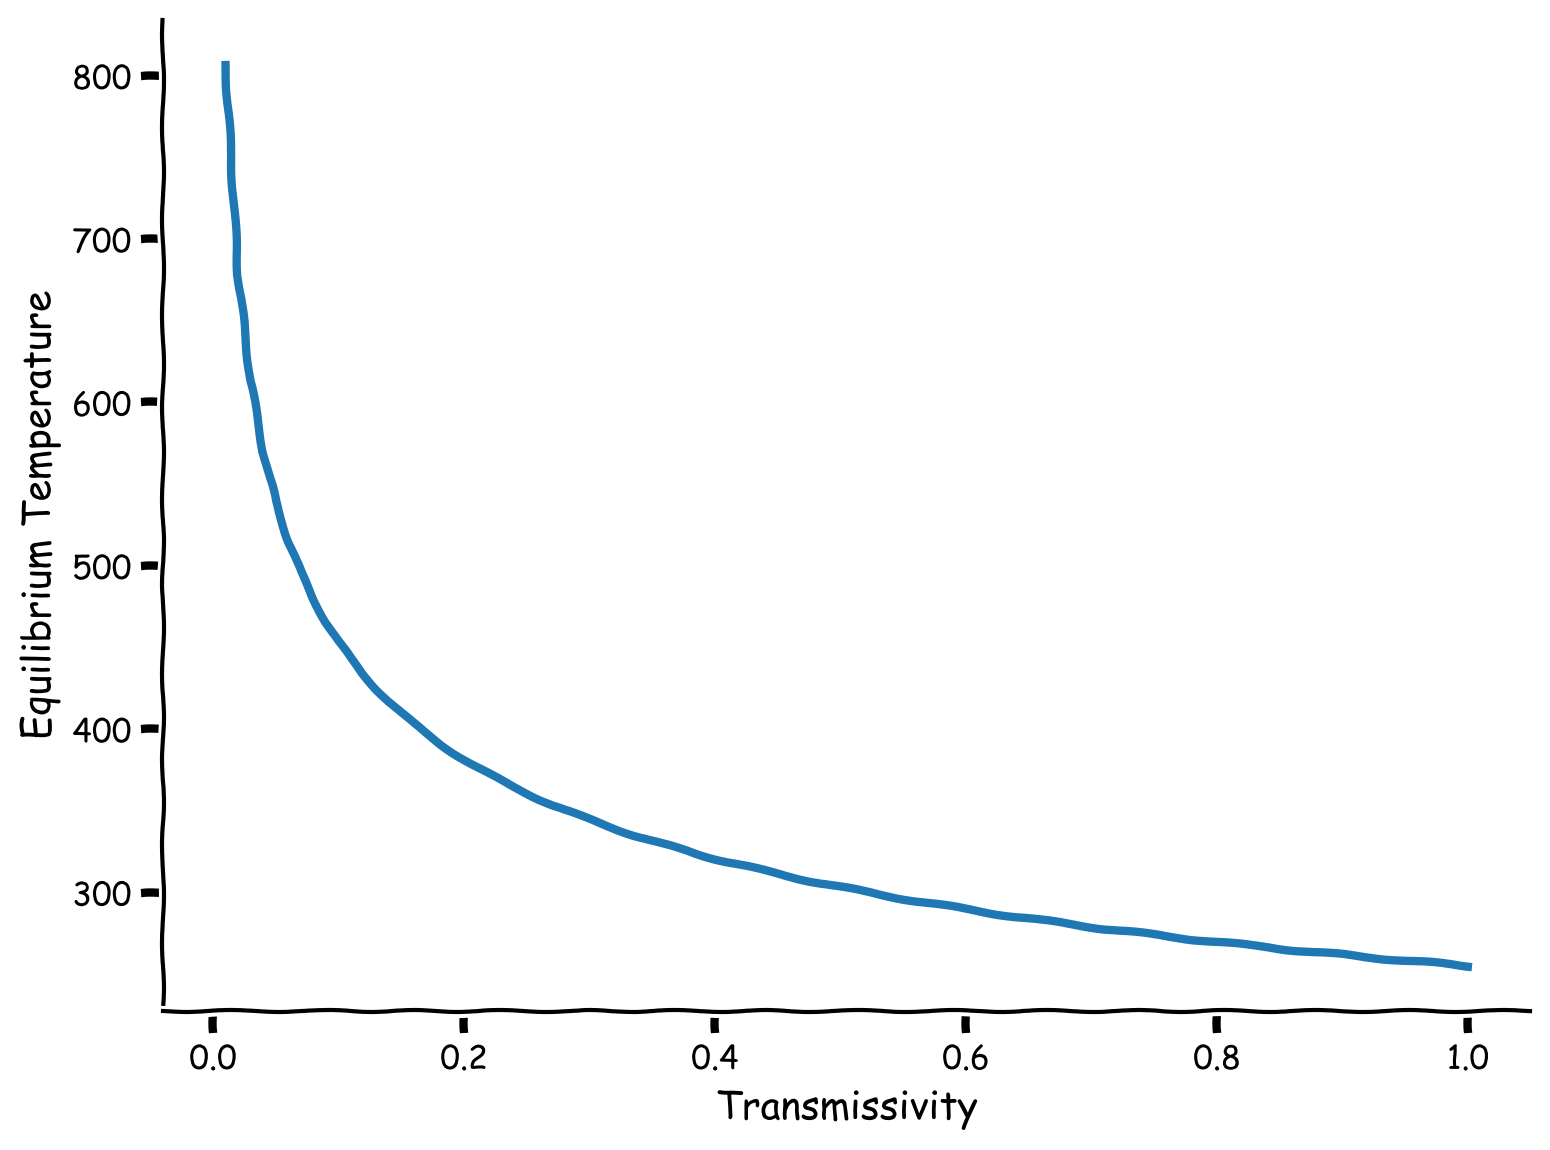

In [15]:
# to_remove solution

# define the observed insolation based on observations from the IPCC AR6 Figure 7.2
Q = 340 # W m^-2

# define the observed reflected radiation based on observations from the IPCC AR6 Figure 7.2
F_ref = 100 # W m^-2

# define albedo
alpha = (F_ref/Q) # unitless number between 0 and 1

# define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
sigma = 5.67e-8 # W m^-2 K^-4

# define a function that returns the equilibrium temperature and takes argument tau
def get_eqT(tau):
  return (((1-alpha)*Q)/(tau * sigma))**(1/4)

# define tau as an array extending from 0 to 1 with spacing interval 0.01
tau = np.arange(0,1.01,.01)

# use list comprehension to obtain the equilibrium temperature as a function of tau
eqT = [get_eqT(t) for t in tau]

with plt.xkcd():
  plt.plot(tau,eqT, lw = 3)
  plt.xlabel('Transmissivity')
  plt.ylabel('Equilibrium Temperature')